In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.columns = ["CID","Gender","Age","AnnIncome","SpendingScore"]
data.head()

,CID,Gender,Age,AnnIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df = data.iloc[:,3:]
df.head()

,AnnIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Text(0, 0.5, 'Spending Score')

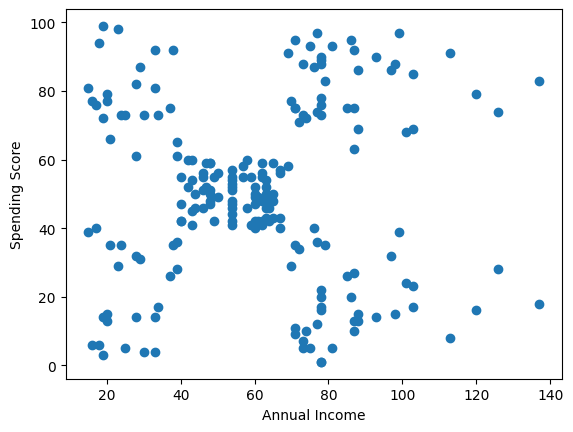

In [6]:
plt.scatter(df["AnnIncome"],df["SpendingScore"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

In [7]:
from sklearn.cluster import KMeans

In [8]:
wcss = []
for i in range(1,19):
    model = KMeans(n_clusters = i)
    model.fit(df)
    wcss.append(model.inertia_)
    
print("WCSS : \n",wcss)

WCSS : 
 [269981.28, 183499.07470288622, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37271.8862365895, 30227.606513152015, 25022.485004530354, 21850.165282585636, 19746.911957660894, 17739.03092959672, 16388.84416926803, 14334.69815904816, 12863.252705627707, 12266.964501494676, 10803.574544315334, 10180.318927386958, 9438.321011216092]


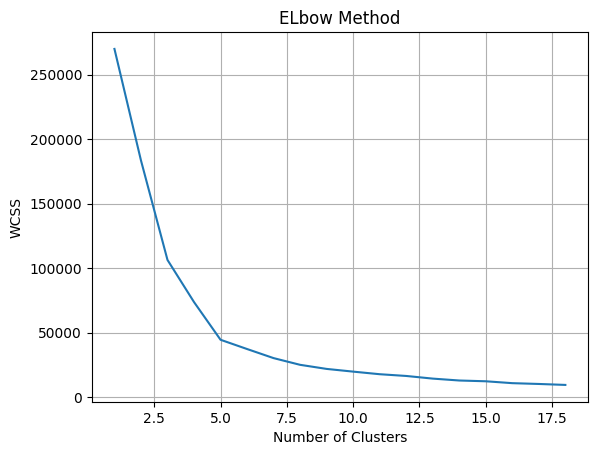

In [9]:
plt.plot(list(range(1,19)),wcss)
plt.title("ELbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid()

In [10]:
k5 = KMeans(n_clusters=5)
k5.fit(df)

KMeans(n_clusters=5)

In [11]:
ypred = k5.predict(df)
print(ypred)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 1 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


In [12]:
centers = k5.cluster_centers_
print(centers)

[[26.30434783 20.91304348]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [25.72727273 79.36363636]]


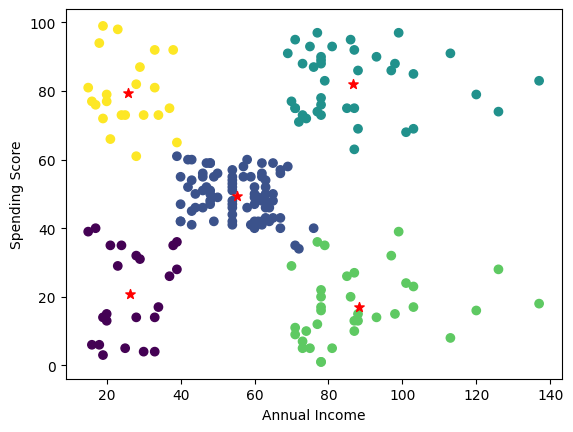

In [13]:
plt.scatter(df["AnnIncome"],df["SpendingScore"],c=ypred)
plt.scatter(centers[:,0:1],centers[:,1:],color='red',marker="*",s=50)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()